# Problema Cinética de Reactor Químico

En un reactor químico se utilizan bacterias que fermentan glucosa para producir etanol. Las concentraciones de las sustancias están dadas por las siguientes ecuaciones:

$$Bacterias: \frac{dC_c}{dt}=\mu_{max}\left(1-\frac{C_p}{C_p^*}\right)^{0.52}\frac{C_cC_s}{K_s+C_s}-k_dC_c$$
$$Glucosa: \frac{dC_s}{dt}=-Y_{s/c}\mu_{max}\left(1-\frac{C_p}{C_p^*}\right)^{0.52}\frac{C_cC_s}{K_s+C_s}-mC_c$$
$$Producto: \frac{dC_p}{dt}=Y_{p/c}\mu_{max}\left(1-\frac{C_p}{C_p^*}\right)^{0.52}\frac{C_cC_s}{K_s+C_s}$$

Donde los valores de los parámetros son:

$C_p^*=93$ $\mathrm{g/dm^3}$,
$\mu_{max} = 0.33$ $\mathrm{h^{-1}}$,
$K_s = 1.7$ $\mathrm{g/dm^3}$,
$m = 0.03$ $\mathrm{h^{-1}}$,
$Y_{s/c} = 12.5$,
$Y_{p/c} = 5.6$,
$k_d = 0.01$ $\mathrm{h^{-1}}$

Además:

$C_c(0) = 1.0$ $\mathrm{g/dm^3}$,
$C_s(0) = 250$ $\mathrm{g/dm^3}$,
$C_p(0) = 0$ $\mathrm{g/dm^3}$

# Solución

Se resolverá  el sistema de ecuaciones diferenciales utilizando SciPy. 
Se calculan las soluciones en los puntos de un arreglo de NumPy de 0 h a 12 h con un espaciado de 0.5 h entre cada valor.


In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

#con =  concentraciones de distintas categorias


def modelo (t, con, cpp, mumax, ks, m, ysc, ypc, kd):
  B, G, P = con
  
  dBdt = mumax*((1-P/cpp)**0.52)*(B*G/(ks+G))-kd*B
  dGdt = -ysc*mumax*((1-P/cpp)**0.52)*(B*G/(ks+G))-m*B
  dPdt = ypc*mumax*((1-P/cpp)**0.52)*(B*G/(ks+G))
  return dBdt, dGdt, dPdt

con0 = [1,250,0]
t = [0,12]
teval = np.linspace(0,12,25)

sol = integrate.solve_ivp(modelo, t, con0, t_eval=teval, args=(93,0.33,1.7,0.03,12.5,5.6,0.01))

sol


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. ])
 t_events: None
        y: array([[  1.        ,   1.17167845,   1.37145358,   1.60336169,
          1.87201759,   2.18230246,   2.53928336,   2.94821324,
          3.41344632,   3.94043938,   4.53557981,   5.20246702,
          5.94187881,   6.7517713 ,   7.62727894,   8.56071454,
          9.54075634,  10.55011411,  11.56651328,  12.56341314,
         13.51166656,  14.37630893,  15.12616413,  15.73567294,
         16.18489302],
       [250.        , 247.77003593, 245.17449384, 242.16058568,
        238.66796872, 234.63258936, 229.98768056, 224.66376184,
        218.60246777, 211.73089345, 203.96365215, 195.25030262,
        185.57577957, 17

In [2]:
np.savetxt("Concentraciones.csv", sol.y.T, delimiter = ",")

In [3]:
concentraciones = np.loadtxt(open("Concentraciones.csv", "r"), delimiter=",")
print(concentraciones)

[[  1.         250.           0.        ]
 [  1.17167845 247.77003593   0.99174172]
 [  1.37145358 245.17449384   2.14601643]
 [  1.60336169 242.16058568   3.48627075]
 [  1.87201759 238.66796872   5.03930779]
 [  2.18230246 234.63258936   6.83356006]
 [  2.53928336 229.98768056   8.89864189]
 [  2.94821324 224.66376184  11.26534943]
 [  3.41344632 218.60246777  13.95948894]
 [  3.94043938 211.73089345  17.01331473]
 [  4.53557981 203.96365215  20.46459927]
 [  5.20246702 195.25030262  24.33546783]
 [  5.94187881 185.57577957  28.63220636]
 [  6.7517713  174.96039367  33.3452615 ]
 [  7.62727894 163.45983157  38.44924061]
 [  8.56071454 151.16515585  43.9029117 ]
 [  9.54075634 138.21345584  49.64447444]
 [ 10.55011411 124.81808596  55.57810553]
 [ 11.56651328 111.25604017  61.57958698]
 [ 12.56341314  97.85954409  67.50012219]
 [ 13.51166656  84.99564543  73.17550863]
 [ 14.37630893  73.10655153  78.40808396]
 [ 15.12616413  62.58940899  83.02057206]
 [ 15.73567294  53.77342572  86.86

In [4]:
concentraciones[:,0]

array([ 1.        ,  1.17167845,  1.37145358,  1.60336169,  1.87201759,
        2.18230246,  2.53928336,  2.94821324,  3.41344632,  3.94043938,
        4.53557981,  5.20246702,  5.94187881,  6.7517713 ,  7.62727894,
        8.56071454,  9.54075634, 10.55011411, 11.56651328, 12.56341314,
       13.51166656, 14.37630893, 15.12616413, 15.73567294, 16.18489302])

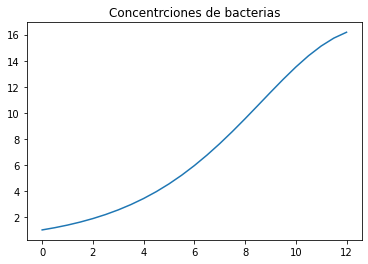

In [5]:
import matplotlib.pyplot as plt

plt.plot(teval, concentraciones[:,0])
plt.title("Concentrciones de bacterias")
plt.show()

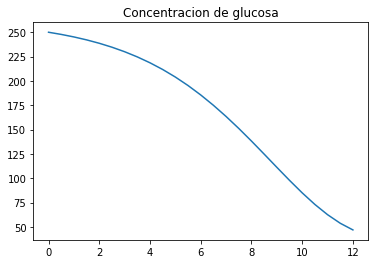

In [6]:
plt.plot(teval, concentraciones[:,1])
plt.title("Concentracion de glucosa")
plt.show()

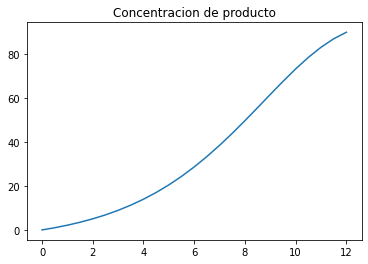

In [7]:
plt.plot(teval, concentraciones[:,2])
plt.title("Concentracion de producto")
plt.show()